<span style="background-color: black; color: white; font-size: 35px; font-weight: bold;">
  Sentiment Data Analysis for IJJ Bank
</span>

- This is an analysis of 1,000 reviews using NLP & Classification modelling

- This notebook performs an analysis of the **bank reviews** from 2019 to 2020 and aim to analyze customer's feedback by **understanding their opinions, emotions, and satisfaction levels** regarding the bank's products, services, and improve **overall customer experience**

Link to dataset: https://www.kaggle.com/code/tanshihjen/sentimentanalysis-bankreviewsdataset/input

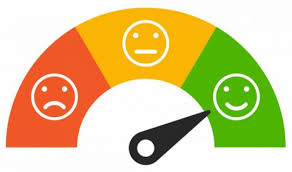

<span style="background-color: orange; color: white; font-size: 30px;">**Business Goal**</span>
- To enhance **customer retention**, improve **marketing strategies**, and effectively **resolve customer complaints** for better satisfaction and brand loyalty.

<span style="background-color: orange; color: white; font-size: 30px;">**What is the objective for this assignment?**</span>


- Objective 3: Analyze customer feedback related to product and services
    - Leverage bank review analysis to **identify opportunities** for **enhancing IJJ's product and service offerings**, ultimately **improving customer experience** and driving **business growth**

<span style="color: blue; text-decoration: underline; font-size: 25px; font-weight: bold;">Data Overview</span> 

The primary data contains the following columns:
- **author**: The user who authored the review, providing valuable insights into the reviewer's identity and perspective.
- **date**: The date when the review was submitted, offering a temporal dimension to the dataset and enabling time-based analysis.
- **address**: The geographical location from which the review was written, contributing to understanding regional trends and variations in banking experiences.
- **bank**: The user's numerical assessment of the bank's service, indicating user satisfaction on a numerical scale.
- **rating**: The user who authored the review, providing valuable insights into the reviewer's identity and perspective.
- **review_titile_by_user**: The user-assigned title to their review, summarizing the essence of their feedback in a concise manner.
- **review**: The detailed content of the user's review about the bank, providing the primary textual data for analysis and insights.
- **bank_image**: The URL pointing to the bank's logo or image relevant to the review, facilitating visual associations with the bank.
- **rating_title_by_user**: The user-assigned title to their rating, potentially offering additional context to the rating value.
- **useful_count**: The count of users who found the review helpful, reflecting the impact and usefulness of the review among other users.

In [4]:
import pandas as pd
import numpy as np
import statsmodels as sm
import pylab as pl
from scipy import stats
from six import StringIO
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import string
from ipywidgets import Dropdown
from ipywidgets import interact, FloatSlider, IntSlider
from IPython.display import display
import ipywidgets as widgets
from IPython.display import display, clear_output
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize


nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\y\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\y\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<span style="color: blue; text-decoration: underline; font-size: 25px; font-weight: bold;">Data Review</span> 

In [6]:
bank_df = pd.read_csv("bank_reviews3.csv", on_bad_lines='warn', na_values={'author': []})


display(bank_df)

,author,date,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count
0,AMRENDRA T,"Mar 21, 2020",New delhi,SBI,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,https://static.bankbazaar.com/images/common/ba...,Great!,133
1,BISHWA,"Mar 20, 2020",Kolkata,SBI,5.0,"""Good service""","I have my salary account in SBI, when I applie...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,89
2,SANTOSH,"Mar 20, 2020",Hooghly,Axis Bank,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,48
3,MAHADEV,"Mar 20, 2020",Pune,HDFC Bank,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,52
4,R,"Mar 20, 2020",Bangalore,review,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,22
...,...,...,...,...,...,...,...,...,...,...
995,A L,"Nov 26, 2019",Ernakulam,review,3.5,"""Good network of ATM""",I am holding a saving account with FEDERAL ban...,https://static.bankbazaar.com/images/common/ba...,Pretty good,3
996,A L,"Nov 26, 2019",Ernakulam,Axis Bank,4.0,"""Mobile app is good""",There is no mandatory balance to keep in my Ax...,https://static.bankbazaar.com/images/common/ba...,Great!,0
997,ANONYMS,"Nov 26, 2019",Bangalore,Axis Bank,4.0,"""Unhappy with the charges""","In Axis bank, every month they are charging me...",https://static.bankbazaar.com/images/common/ba...,Great!,0
998,SAJJANOJU,"Nov 26, 2019",Hyderabad,Axis Bank,5.0,"""Good Bank""",I have a salary account with AXIS bank and I h...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,0


In [7]:
print ("Rows     : " , bank_df.shape[0])
print ("Columns  : " , bank_df.shape[1])

Rows     :  1000
Columns  :  10


In [8]:
bank_df['date'] = pd.to_datetime(bank_df['date'],format='%b %d, %Y')

In [9]:
# Extract the latest and earliest date
earliest_date = bank_df['date'].min()
latest_date = bank_df['date'].max()

# Calculate the difference in days
date_difference = (latest_date - earliest_date).days

print(f"The earliest date is: {earliest_date}")
print(f"The latest date is: {latest_date}")

# Display the result
print(f"The difference in days between the latest and earliest date is: {date_difference} days")

The earliest date is: 2019-11-26 00:00:00
The latest date is: 2020-03-21 00:00:00
The difference in days between the latest and earliest date is: 116 days


### Create list of bank review document

&#8594; Map the rating titles into sentiments grouping of "positive", "neutral" and "negative" for more simplified analysis. The rationale behind mapping sentiments in the sentiment_mapping dictionary is to simplify the process of categorizing and analyzing textual data, specifically reviews, into predefined sentiment categories (e.g., "Positive," "Neutral," "Negative"). 

Below is the sentiment mapping designed to cover clear and well-known expressions of sentiment:

- Positive: "Great!", "Blown Away!", "Excellent!", "Pretty good"
- Neutral: "Satisfactory", "Just OK", "Expected more"
- Negative: "Unacceptable", "Bad", "Really Bad"

### Distribution of Sentiment

&#8594; The dataset is imbalanced, with majority of rows labeled as **Positive**, followed by **Neutral** and **Negative** sentiment. Most of the customers have positive experiences. For Machine Learning model, to avoid biasness from the imbalanced data, some tecnhiques can be used to overcome imbalance dataset. One of them would be Resampling techniques - _**<span style="color:green">Oversampling</span>**_ (increase Negative / Neutral samples) or  _**<span style="color:green">Undersampling</span>**_ (reduce Positive samples).

(1000, 11)


,author,date,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count,Sentiment
0,AMRENDRA T,2020-03-21,New delhi,SBI,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,https://static.bankbazaar.com/images/common/ba...,Great!,133,Positive
1,BISHWA,2020-03-20,Kolkata,SBI,5.0,"""Good service""","I have my salary account in SBI, when I applie...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,89,Positive
2,SANTOSH,2020-03-20,Hooghly,Axis Bank,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,48,Positive
3,MAHADEV,2020-03-20,Pune,HDFC Bank,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,52,Positive
4,R,2020-03-20,Bangalore,review,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,22,Positive


C:\Users\y\AppData\Local\Temp\ipykernel_7300\2767652582.py:24: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(bank_df['Sentiment']).plot.bar(title="Sentiment Distribution")


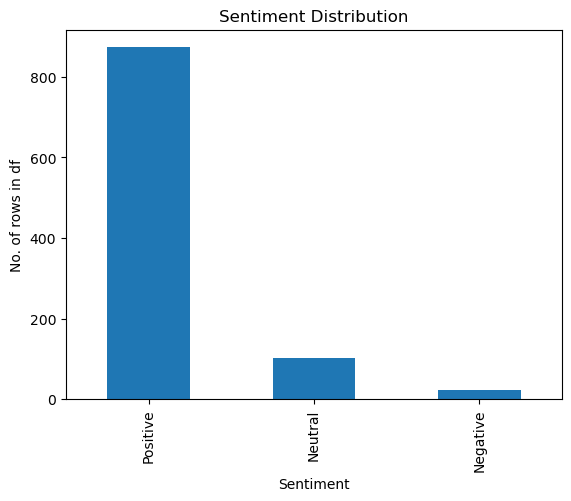

In [11]:
# Define the mapping dictionary
sentiment_mapping = {
    "Great!": "Positive",
    "Blown Away!": "Positive",
    "Excellent!": "Positive",
    "Pretty good": "Positive",
    "Satisfactory": "Neutral",
    "Just OK": "Neutral",
    "Expected more": "Neutral",
    "Unacceptable": "Negative",
    "Bad": "Negative",
    "Really Bad": "Negative"
}

# Apply the mapping to the column
bank_df["Sentiment"] = bank_df["rating_title_by_user"].map(sentiment_mapping)

# Display the updated dataframe
print(bank_df.shape)
display(bank_df.head())

# Plotting the Sentiment distribution
plt.figure()
pd.value_counts(bank_df['Sentiment']).plot.bar(title="Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

### Words existing in "Review" column

- Several prominent words that stand out: "account", "bank", "banking", "service", "good", "mobile", "net", "minimum", "balance", and "charge". Some of these words can be excluded as those words may not be very meaningful for sentiment analysis -> e.g. bank, banking
- 
Based on this word cloud, it can be inferred that the reviews are predominantly positive and focus on core banking services like accounts, general service quality, and specific features like mobile apps. 

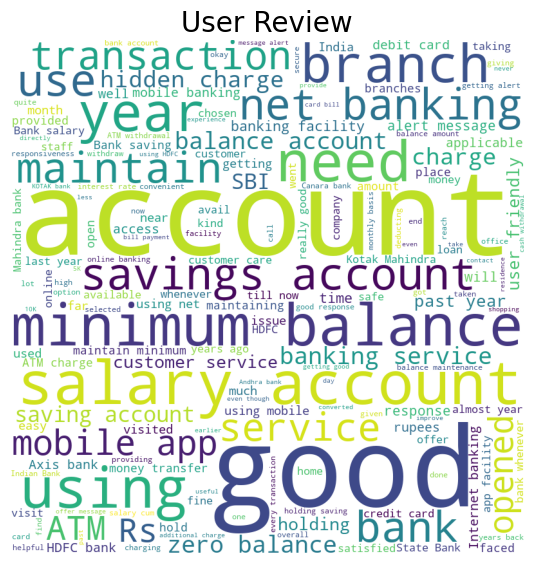

In [13]:
from wordcloud import WordCloud

combined_reviews = ' '.join(bank_df['review'])

# create a word cloud using the combined reviews
wordcloud_reviews = WordCloud(width=800, height=800,
                              background_color='white',
                              min_font_size=10).generate(combined_reviews)

# plot the WordCloud image
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud_reviews)
plt.axis('off')
plt.title('User Review', fontsize=20)
plt.tight_layout(pad=2)
plt.show()

In [14]:
#preview data (bank_review data)
bank_df.head()

,author,date,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count,Sentiment
0,AMRENDRA T,2020-03-21,New delhi,SBI,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,https://static.bankbazaar.com/images/common/ba...,Great!,133,Positive
1,BISHWA,2020-03-20,Kolkata,SBI,5.0,"""Good service""","I have my salary account in SBI, when I applie...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,89,Positive
2,SANTOSH,2020-03-20,Hooghly,Axis Bank,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,48,Positive
3,MAHADEV,2020-03-20,Pune,HDFC Bank,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,52,Positive
4,R,2020-03-20,Bangalore,review,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,22,Positive


In [15]:
# top level overview of the dataset
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   author                996 non-null    object        
 1   date                  1000 non-null   datetime64[ns]
 2   address               1000 non-null   object        
 3   bank                  1000 non-null   object        
 4   rating                1000 non-null   float64       
 5   review_title_by_user  1000 non-null   object        
 6   review                1000 non-null   object        
 7   bank_image            1000 non-null   object        
 8   rating_title_by_user  1000 non-null   object        
 9   useful_count          1000 non-null   int64         
 10  Sentiment             1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 86.1+ KB


In [16]:
# Get some base information on the dataset
print ("Rows     : " , bank_df.shape[0])
print ("Columns  : " , bank_df.shape[1])
print ("\nFeatures : \n" ,bank_df.columns.tolist())
print ("\nMissing values :  ", bank_df.isnull().sum().values.sum())
print ("\nUnique values :  \n", bank_df.nunique())

Rows     :  1000
Columns  :  11

Features : 
 ['author', 'date', 'address', 'bank', 'rating', 'review_title_by_user', 'review', 'bank_image', 'rating_title_by_user', 'useful_count', 'Sentiment']

Missing values :   4

Unique values :  
 author                  620
date                    110
address                 107
bank                     10
rating                   10
review_title_by_user    352
review                  999
bank_image               10
rating_title_by_user     10
useful_count             39
Sentiment                 3
dtype: int64


In [17]:
# Get statistics for numerical columns 
bank_df.describe() 

,date,rating,useful_count
count,1000,1000.000000,1000.000000
mean,2020-01-22 23:18:14.400000256,4.351500,2.752000
min,2019-11-26 00:00:00,0.500000,0.000000
25%,2019-12-24 00:00:00,4.000000,0.000000
50%,2020-01-21 00:00:00,5.000000,0.000000
75%,2020-02-22 00:00:00,5.000000,2.000000
max,2020-03-21 00:00:00,5.000000,133.000000
std,NaN,0.940788,7.638904


<span style="color: blue; text-decoration: underline; font-size: 25px; font-weight: bold;">Data Cleaning/Transformation</span>

In [19]:
# Find where the missing values are located
bank_df.isnull().sum()

author                  4
date                    0
address                 0
bank                    0
rating                  0
review_title_by_user    0
review                  0
bank_image              0
rating_title_by_user    0
useful_count            0
Sentiment               0
dtype: int64

In [20]:
print(bank_df.dtypes)

author                          object
date                    datetime64[ns]
address                         object
bank                            object
rating                         float64
review_title_by_user            object
review                          object
bank_image                      object
rating_title_by_user            object
useful_count                     int64
Sentiment                       object
dtype: object


In [21]:
#how these records with missing "author" look
bank_df.loc[bank_df['author'].isnull()].head()

,author,date,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count,Sentiment
17,NaN,2020-03-19,Hyderabad,SBI,4.0,"""Need to improve service """,I am using saving account from SBI almost 7-8 ...,https://static.bankbazaar.com/images/common/ba...,Great!,34,Positive
36,NaN,2020-03-17,Bangalore,review,4.5,"""Good """,I am holding a salary account from BANK OF BAR...,https://static.bankbazaar.com/images/common/ba...,Excellent!,15,Positive
390,NaN,2020-02-03,Chennai,Axis Bank,3.0,"""Need to improve their service""",I have been using AXIS bank saving account fo...,https://static.bankbazaar.com/images/common/ba...,Satisfactory,1,Neutral
992,NaN,2019-11-26,Bangalore,review,3.0,"""Good""",For the past 6 months I am holding a salary ac...,https://static.bankbazaar.com/images/common/ba...,Satisfactory,0,Neutral


- Removed leading and trailing whitespace for more consistent data format

In [23]:
# Remove leading and trailing whitespace
bank_df.columns = bank_df.columns.str.strip()

display(bank_df.head())

,author,date,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count,Sentiment
0,AMRENDRA T,2020-03-21,New delhi,SBI,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,https://static.bankbazaar.com/images/common/ba...,Great!,133,Positive
1,BISHWA,2020-03-20,Kolkata,SBI,5.0,"""Good service""","I have my salary account in SBI, when I applie...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,89,Positive
2,SANTOSH,2020-03-20,Hooghly,Axis Bank,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,48,Positive
3,MAHADEV,2020-03-20,Pune,HDFC Bank,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,52,Positive
4,R,2020-03-20,Bangalore,review,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,22,Positive


- Identify duplicates under review column - no duplicates found

In [25]:
# Fill NaN values in the 'author' column with an empty string
bank_df['author'] = bank_df['author'].fillna('')

# Concatenate 'author' and 'review', ensuring the 'review' column is always included
bank_df['author_review'] = bank_df['author'].str.strip() + ' ' + bank_df['review']

# Remove leading/trailing spaces in case 'author' is empty
bank_df['author_review'] = bank_df['author_review'].str.strip()

# Identify duplicates based on the 'author_review' column
duplicates = bank_df.duplicated(subset=['author_review'])

# Display duplicate rows
print("Duplicate Rows Based on 'author' and 'review':")
display(bank_df[duplicates])

# Count duplicate rows based on the 'author_review' column
duplicate_count = duplicates.sum()

print(f"Number of duplicate rows based on 'author_review': {duplicate_count}")

Duplicate Rows Based on 'author' and 'review':


,author,date,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count,Sentiment,author_review


Number of duplicate rows based on 'author_review': 0


In [26]:
# Concatenate 'author' and 'review' columns to create a new column 'author_review'
bank_df['author_review'] = bank_df['author'] + ' ' + bank_df['review']

# Identify duplicates based on the 'author_review' column
duplicates = bank_df.duplicated(subset=['author_review'])

# Display duplicate rows
print("Duplicate Rows Based on 'author' and 'review':")
display(bank_df[duplicates])

# Count duplicate rows based on the 'author_review' column
duplicate_count = bank_df.duplicated(subset=['author_review']).sum()

print(f"Number of duplicate rows based on 'author_review': {duplicate_count}")

Duplicate Rows Based on 'author' and 'review':


,author,date,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count,Sentiment,author_review


Number of duplicate rows based on 'author_review': 0


- Remove columns that are not using for analysis - columns/features that are likley not meaningful for sentiment classification

In [28]:
# remove columns that are not using for analysis - columns/features that won't help sentiment classification
# columns to remove: ['author', 'date', 'address', 'bank', 'bank_image', 'useful_count']

bank_df.drop(columns=['author', 'date', 'address', 'bank', 'bank_image', 'useful_count'], axis=1, inplace=True)

display(bank_df.head())
print(bank_df.dtypes)
print(bank_df.columns)

,rating,review_title_by_user,review,rating_title_by_user,Sentiment,author_review
0,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,Great!,Positive,AMRENDRA T State Bank Of India is located nea...
1,5.0,"""Good service""","I have my salary account in SBI, when I applie...",Blown Away!,Positive,"BISHWA I have my salary account in SBI, when I..."
2,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,Blown Away!,Positive,SANTOSH I am using Axis bank saving account fo...
3,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,Blown Away!,Positive,MAHADEV I have my salary bank account in HDFC ...
4,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",Blown Away!,Positive,"R Close to around 10 years, I am holding this ..."


rating                  float64
review_title_by_user     object
review                   object
rating_title_by_user     object
Sentiment                object
author_review            object
dtype: object
Index(['rating', 'review_title_by_user', 'review', 'rating_title_by_user',
       'Sentiment', 'author_review'],
      dtype='object')


### Mapping for bank names - generalise to one bank 
- Defining a mapping for various variations of bank names (in different cases) to the word/string "Bank". This is done to standardise the data for only one bank (IJJ bank) which helps eliminate potential noise, make the reviews less specific (the datapoint is not meaningful for sentiment analyis) to allow more focus on the underlying sentiment/feedback.  

In [30]:
import re

# 1. Define the Bank Name Mapping (as a Python dictionary)
bank_name_mapping = {
    "SBI": "Bank",  # Direct mapping to "Bank"
    "Axis": "Bank",
    "HDFC": "Bank",
    "IDBI": "Bank",
    "Kotak": "Bank",
    "IndusInd Bank": "Bank",
    "Canara Bank": "Bank",
    "Citibank": "Bank",
    "Punjab National Bank": "Bank",
    "sbi": "Bank",  # Direct mapping to "Bank"
    "AXIS": "Bank",
    "hdfc": "Bank",
    "idbi": "Bank",
    "KOTAK": "Bank",
    "INDUSIND": "Bank",
    "CANARA": "Bank",
    "CITIBANK": "Bank",
    "PUNJAB NATIONAL": "Bank",
    "State Bank Of India": "Bank",
}

# 2. Function to Replace Bank Names with "Bank"
def replace_with_bank(text):
    if isinstance(text, str):  # Handle potential missing values (NaN)
        for variation in bank_name_mapping:
            # Use regular expressions to replace exact matches (case insensitive)
            text = re.sub(r'\b' + re.escape(variation) + r'\b', "Bank", text, flags=re.IGNORECASE)
    return text

# 3. Apply the Replacement Function to the 'review' column
bank_df['review_modified'] = bank_df['review'].apply(replace_with_bank)

# Display the modified DataFrame
display(bank_df.head())

,rating,review_title_by_user,review,rating_title_by_user,Sentiment,author_review,review_modified
0,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,Great!,Positive,AMRENDRA T State Bank Of India is located nea...,Bank is located nearby in our area so i open m...
1,5.0,"""Good service""","I have my salary account in SBI, when I applie...",Blown Away!,Positive,"BISHWA I have my salary account in SBI, when I...","I have my salary account in Bank, when I appli..."
2,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,Blown Away!,Positive,SANTOSH I am using Axis bank saving account fo...,I am using Bank bank saving account for the p...
3,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,Blown Away!,Positive,MAHADEV I have my salary bank account in HDFC ...,I have my salary bank account in Bank bank for...
4,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",Blown Away!,Positive,"R Close to around 10 years, I am holding this ...","Close to around 10 years, I am holding this Co..."


- Converting the review column to lowercase

In [32]:
# Convert review column to lowercase 
bank_df['review_modified'] = bank_df['review_modified'].str.lower()

# Check the changes
display(bank_df[['review', 'review_modified']].head())

,review,review_modified
0,State Bank Of India is located nearby in our a...,bank is located nearby in our area so i open m...
1,"I have my salary account in SBI, when I applie...","i have my salary account in bank, when i appli..."
2,I am using Axis bank saving account for the p...,i am using bank bank saving account for the p...
3,I have my salary bank account in HDFC bank for...,i have my salary bank account in bank bank for...
4,"Close to around 10 years, I am holding this Co...","close to around 10 years, i am holding this co..."


- Removing stopwords (list of English stopwords from NLTK), kept negation words to help assist in identifying/interpreting sentiment 
- Remove irrelevant words (context-specific words likely to appear in both positive & negative reviews) that do not inherently express positive/negative sentiments 

In [34]:
nltk.download('stopwords')

# Get the default NLTK stopwords
stop_words = set(stopwords.words('english'))

# Define a set of negation words to retain
negation_words = {"not", "no", "never", "none", "nothing", "nowhere", "neither", "nobody", "isn't", "aren't", "wasn't", "weren't", 
                  "doesn't", "don't", "didn't", "hasn't", "haven't", "hadn't", "won't", "wouldn't", "shan't", "shouldn't", "can't", "cannot", "couldn't", "mustn't"}

# Define custom stopwords (including words like 'bank', 'transaction', etc.)
custom_stopwords = stop_words | {"bank", "banking", "balance", "money", "transaction"}

# Remove negation words from the custom stopwords set to retain them
filtered_stopwords = custom_stopwords - negation_words

# Function to remove stopwords while retaining negation words
def remove_stopwords(text):
    # Ensure the text is a string before processing
    if isinstance(text, str):
        return ' '.join([word for word in text.split() if word.lower() not in filtered_stopwords])
    else:
        return text  # Return the original value if it's not a string

# Apply the function to the 'review_modified' column
bank_df['review_modified'] = bank_df['review_modified'].apply(remove_stopwords)

# Check the changes
display(bank_df[['review', 'review_modified']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\y\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,review_modified
0,State Bank Of India is located nearby in our a...,"located nearby area open saving account ,custo..."
1,"I have my salary account in SBI, when I applie...","salary account bank, applied card got statemen..."
2,I am using Axis bank saving account for the p...,using saving account past 3years .each safe al...
3,I have my salary bank account in HDFC bank for...,"salary account many years, got statement time...."
4,"Close to around 10 years, I am holding this Co...","close around 10 years, holding corporation sav..."


- Remove punctuation marks from review column

In [36]:
# Function to remove punctuation from text
def remove_punctuation(text):
    # Create a translation table that maps each punctuation character to None
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply the function to the 'review' column (or any specific column)
bank_df['review_modified'] = bank_df['review_modified'].apply(remove_punctuation)

# Check the first few rows to verify the changes
display(bank_df[['review', 'review_modified']].head())

,review,review_modified
0,State Bank Of India is located nearby in our a...,located nearby area open saving account custom...
1,"I have my salary account in SBI, when I applie...",salary account bank applied card got statement...
2,I am using Axis bank saving account for the p...,using saving account past 3years each safe alw...
3,I have my salary bank account in HDFC bank for...,salary account many years got statement timeth...
4,"Close to around 10 years, I am holding this Co...",close around 10 years holding corporation savi...


- Remove numbers from review column

In [38]:
# Function to remove numbers from text
def remove_numbers(text):
    # Use a regular expression to replace digits with an empty string
    return re.sub(r'\d+', '', text)

# Apply the function to the 'review' column (or any specific column)
bank_df['review_modified'] = bank_df['review_modified'].apply(remove_numbers)

# Check the first few rows to verify the changes
display(bank_df[['review', 'review_modified']].head())

,review,review_modified
0,State Bank Of India is located nearby in our a...,located nearby area open saving account custom...
1,"I have my salary account in SBI, when I applie...",salary account bank applied card got statement...
2,I am using Axis bank saving account for the p...,using saving account past years each safe alwa...
3,I have my salary bank account in HDFC bank for...,salary account many years got statement timeth...
4,"Close to around 10 years, I am holding this Co...",close around years holding corporation saving...


- Applied POS tagger and lemmatization on review column. It helps with word sense disambiguation and better feature represenation. Used POS tag+lemmatization instead of stemming as lemmatization preserves sentiment nuances and considers the context of words

In [40]:
# Download necessary NLTK resources (if you haven't already)
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function for POS-tagged lemmatization (Corrected)
def lemmatize_with_pos(text):
    if isinstance(text, str):
        words = nltk.word_tokenize(text)
        tagged_words = pos_tag(words)

        lemmatized_words = []
        for word, tag in tagged_words:
            pos = None  # Initialize pos to None for each word
            if tag.startswith('NN'):
                pos = 'n'
            elif tag.startswith('VB'):
                pos = 'v'
            elif tag.startswith('JJ'):
                pos = 'a'
            elif tag.startswith('RB'):
                pos = 'r'
            
            # Handle cases where pos is still None (e.g., other POS tags)
            if pos is None:  # If no match found, use default 'n' or skip
                lemma = lemmatizer.lemmatize(word) # Lemmatize without POS tag (defaults to noun 'n')
            else:
                lemma = lemmatizer.lemmatize(word, pos=pos)  # Use mapped POS tag
            lemmatized_words.append(lemma)

        return " ".join(lemmatized_words)
    return text

# Apply the lemmatization function
bank_df['review_modified'] = bank_df['review_modified'].apply(lemmatize_with_pos)

# Display the results
display(bank_df[['review', 'review_modified']].head(10))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\y\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\y\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\y\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review,review_modified
0,State Bank Of India is located nearby in our a...,locate nearby area open save account customer ...
1,"I have my salary account in SBI, when I applie...",salary account bank apply card get statement t...
2,I am using Axis bank saving account for the p...,use save account past year each safe always se...
3,I have my salary bank account in HDFC bank for...,salary account many year get statement timethi...
4,"Close to around 10 years, I am holding this Co...",close around year hold corporation saving acco...
5,I am not getting an alert message from IDBI ba...,not get alert message whenever end check accou...
6,I am using savings account from SBI more than ...,use saving account year dont keep balance dedu...
7,"Its been 2 years, i am using Kotak Bank saving...",year use saving account really super service t...
8,"Since 2002, I am maintain my savings account f...",since maintain saving account bank salary come...
9,An executive has made to open an account with ...,executive make open account bank use account l...


In [41]:
display(bank_df)

,rating,review_title_by_user,review,rating_title_by_user,Sentiment,author_review,review_modified
0,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,Great!,Positive,AMRENDRA T State Bank Of India is located nea...,locate nearby area open save account customer ...
1,5.0,"""Good service""","I have my salary account in SBI, when I applie...",Blown Away!,Positive,"BISHWA I have my salary account in SBI, when I...",salary account bank apply card get statement t...
2,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,Blown Away!,Positive,SANTOSH I am using Axis bank saving account fo...,use save account past year each safe always se...
3,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,Blown Away!,Positive,MAHADEV I have my salary bank account in HDFC ...,salary account many year get statement timethi...
4,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",Blown Away!,Positive,"R Close to around 10 years, I am holding this ...",close around year hold corporation saving acco...
...,...,...,...,...,...,...,...
995,3.5,"""Good network of ATM""",I am holding a saving account with FEDERAL ban...,Pretty good,Positive,A L I am holding a saving account with FEDERAL...,hold save account federal bank charge rs every...
996,4.0,"""Mobile app is good""",There is no mandatory balance to keep in my Ax...,Great!,Positive,A L There is no mandatory balance to keep in m...,no mandatory keep interest rate little bit hig...
997,4.0,"""Unhappy with the charges""","In Axis bank, every month they are charging me...",Great!,Positive,"ANONYMS In Axis bank, every month they are cha...",bank every month charge around rs consolidated...
998,5.0,"""Good Bank""",I have a salary account with AXIS bank and I h...,Blown Away!,Positive,SAJJANOJU I have a salary account with AXIS ba...,salary account hold account last year no minim...


<span style="color: blue; text-decoration: underline; font-size: 25px; font-weight: bold;">Data Exploration</span>

### Words existing in "Review_modified" column

Several prominent words that stand out: "account", "bank", "banking", "service", "HDFC", "good", "mobile", "net", "minimum", "balance", and "charge". Some of these words can be excluded as those words are not very meaningful for sentiment analysis -> bank, banking, 

Based on this word cloud, it can be inferred that the reviews are predominantly positive and focus on core banking services like accounts, general service quality, and specific features like mobile apps. 

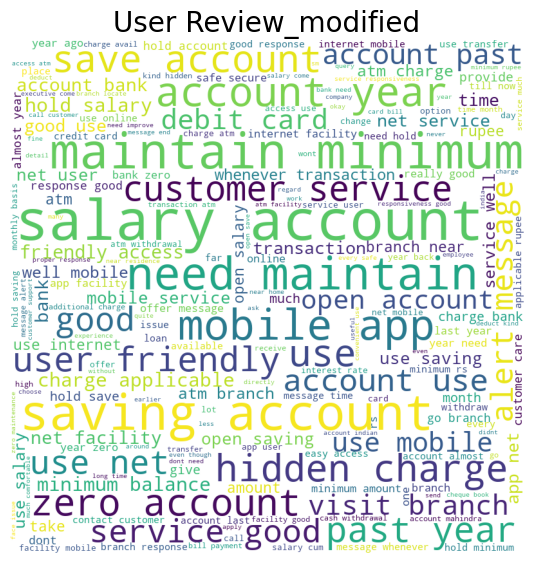

In [44]:
from wordcloud import WordCloud

combined_reviews = ' '.join(bank_df['review_modified'])

# create a word cloud using the combined reviews
wordcloud_reviews = WordCloud(width=800, height=800,
                              background_color='white',
                              min_font_size=10).generate(combined_reviews)

# plot the WordCloud image
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud_reviews)
plt.axis('off')
plt.title('User Review_modified', fontsize=20)
plt.tight_layout(pad=2)
plt.show()

In [45]:
print(bank_df['review_modified'].isnull().sum())  # Count NaN values
print((bank_df['review_modified'] == '').sum())  # Count empty strings

0
0


In [46]:
# Count how many reviews are empty strings after cleaning
empty_reviews = bank_df['review_modified'].apply(lambda x: len(x.strip()) == 0)
print(f"Number of empty reviews after cleaning: {empty_reviews.sum()}")

# You can also inspect some cleaned reviews to see if they are empty
print(bank_df['review_modified'].head(20))

Number of empty reviews after cleaning: 0
0     locate nearby area open save account customer ...
1     salary account bank apply card get statement t...
2     use save account past year each safe always se...
3     salary account many year get statement timethi...
4     close around year hold corporation saving acco...
5     not get alert message whenever end check accou...
6     use saving account year dont keep balance dedu...
7     year use saving account really super service t...
8     since maintain saving account bank salary come...
9     executive make open account bank use account l...
10    come know trial charge open save account app s...
11    mother suggest open save account them since go...
12    use save account year join previous company ma...
13    indian cash deposit machine not convenient use...
14    best internet fast easy access one use saving ...
15    yes service good hold save account year past t...
16    hold salary account past year get immediate al...
17    

In [47]:
print(f"Shape of cleaned data: {bank_df['review_modified'].shape}")

Shape of cleaned data: (1000,)


In [48]:
display(bank_df)

,rating,review_title_by_user,review,rating_title_by_user,Sentiment,author_review,review_modified
0,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,Great!,Positive,AMRENDRA T State Bank Of India is located nea...,locate nearby area open save account customer ...
1,5.0,"""Good service""","I have my salary account in SBI, when I applie...",Blown Away!,Positive,"BISHWA I have my salary account in SBI, when I...",salary account bank apply card get statement t...
2,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,Blown Away!,Positive,SANTOSH I am using Axis bank saving account fo...,use save account past year each safe always se...
3,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,Blown Away!,Positive,MAHADEV I have my salary bank account in HDFC ...,salary account many year get statement timethi...
4,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",Blown Away!,Positive,"R Close to around 10 years, I am holding this ...",close around year hold corporation saving acco...
...,...,...,...,...,...,...,...
995,3.5,"""Good network of ATM""",I am holding a saving account with FEDERAL ban...,Pretty good,Positive,A L I am holding a saving account with FEDERAL...,hold save account federal bank charge rs every...
996,4.0,"""Mobile app is good""",There is no mandatory balance to keep in my Ax...,Great!,Positive,A L There is no mandatory balance to keep in m...,no mandatory keep interest rate little bit hig...
997,4.0,"""Unhappy with the charges""","In Axis bank, every month they are charging me...",Great!,Positive,"ANONYMS In Axis bank, every month they are cha...",bank every month charge around rs consolidated...
998,5.0,"""Good Bank""",I have a salary account with AXIS bank and I h...,Blown Away!,Positive,SAJJANOJU I have a salary account with AXIS ba...,salary account hold account last year no minim...


In [49]:
print(bank_df['Sentiment'].unique())  # Check unique values in the 'Sentiment' column

['Positive' 'Neutral' 'Negative']


In [50]:
print(bank_df['Sentiment'].value_counts())

Sentiment
Positive    873
Neutral     103
Negative     24
Name: count, dtype: int64


In [51]:
print(bank_df['Sentiment'].isna().sum())

0


In [52]:
display(bank_df)

,rating,review_title_by_user,review,rating_title_by_user,Sentiment,author_review,review_modified
0,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,Great!,Positive,AMRENDRA T State Bank Of India is located nea...,locate nearby area open save account customer ...
1,5.0,"""Good service""","I have my salary account in SBI, when I applie...",Blown Away!,Positive,"BISHWA I have my salary account in SBI, when I...",salary account bank apply card get statement t...
2,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,Blown Away!,Positive,SANTOSH I am using Axis bank saving account fo...,use save account past year each safe always se...
3,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,Blown Away!,Positive,MAHADEV I have my salary bank account in HDFC ...,salary account many year get statement timethi...
4,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",Blown Away!,Positive,"R Close to around 10 years, I am holding this ...",close around year hold corporation saving acco...
...,...,...,...,...,...,...,...
995,3.5,"""Good network of ATM""",I am holding a saving account with FEDERAL ban...,Pretty good,Positive,A L I am holding a saving account with FEDERAL...,hold save account federal bank charge rs every...
996,4.0,"""Mobile app is good""",There is no mandatory balance to keep in my Ax...,Great!,Positive,A L There is no mandatory balance to keep in m...,no mandatory keep interest rate little bit hig...
997,4.0,"""Unhappy with the charges""","In Axis bank, every month they are charging me...",Great!,Positive,"ANONYMS In Axis bank, every month they are cha...",bank every month charge around rs consolidated...
998,5.0,"""Good Bank""",I have a salary account with AXIS bank and I h...,Blown Away!,Positive,SAJJANOJU I have a salary account with AXIS ba...,salary account hold account last year no minim...


In [53]:
print(bank_df.dtypes)

rating                  float64
review_title_by_user     object
review                   object
rating_title_by_user     object
Sentiment                object
author_review            object
review_modified          object
dtype: object


### Overall distribution of rating (by rating score) in 1000 reviews

Based on the below chartsm it is observed that the most common rating is 5.0, representing 55% of all reviews. The next most frequent is 4.0, at 25.7%. The distribution is heavily skewed towards positive reviews, with relatively few reviews below 3.0.

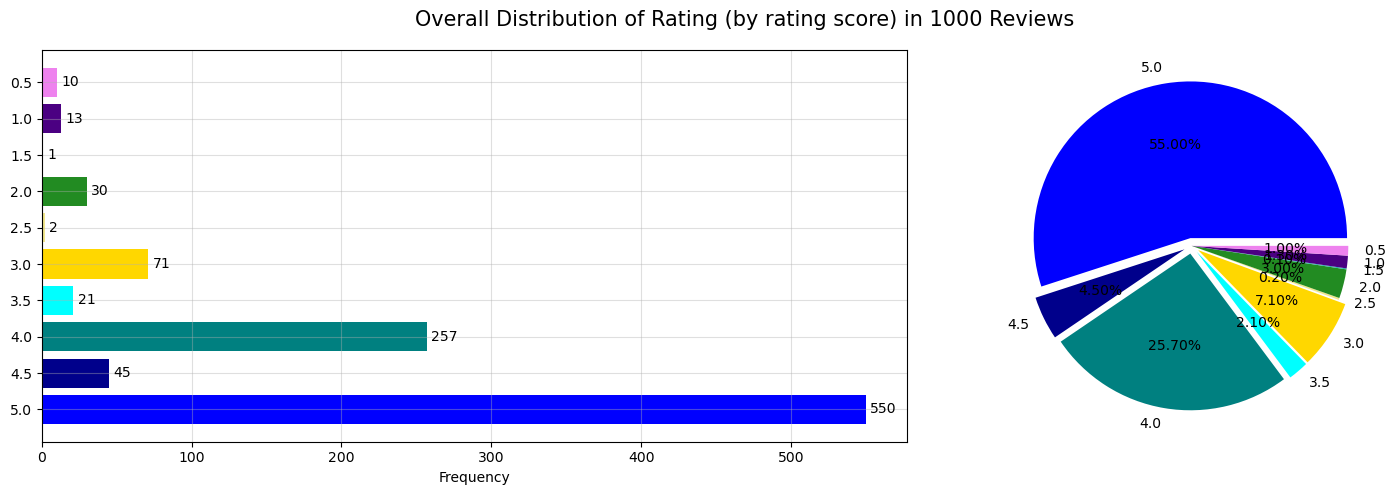

In [55]:
colors = ['blue', 'darkblue', 'teal', 'cyan', 'gold', 'khaki', 'forestgreen', 'lightseagreen', 'indigo', 'violet']
explodes = ([0.05]*5) + ([0]*5)

# distribution of rating (by rating score)
# convert the rating from int to str
bank_df = bank_df.copy()
bank_df['rating'] = bank_df['rating'].astype(str)

rating = bank_df['rating'].value_counts().sort_index(ascending=False)

# visualization in bar chart and pie chart
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=rating.index, width=rating.values, color=colors)
axes[0].set_xlabel('Frequency')

for index, values in enumerate (rating):
    axes[0].text(values+3, index, str(values), va='center')

axes[0].grid(alpha=0.4)
axes[1].pie(rating.values, labels=rating.index, autopct='%.2f%%', explode=explodes, colors=colors)
figure.suptitle('Overall Distribution of Rating (by rating score) in 1000 Reviews', fontsize=15)
plt.tight_layout()
plt.show()

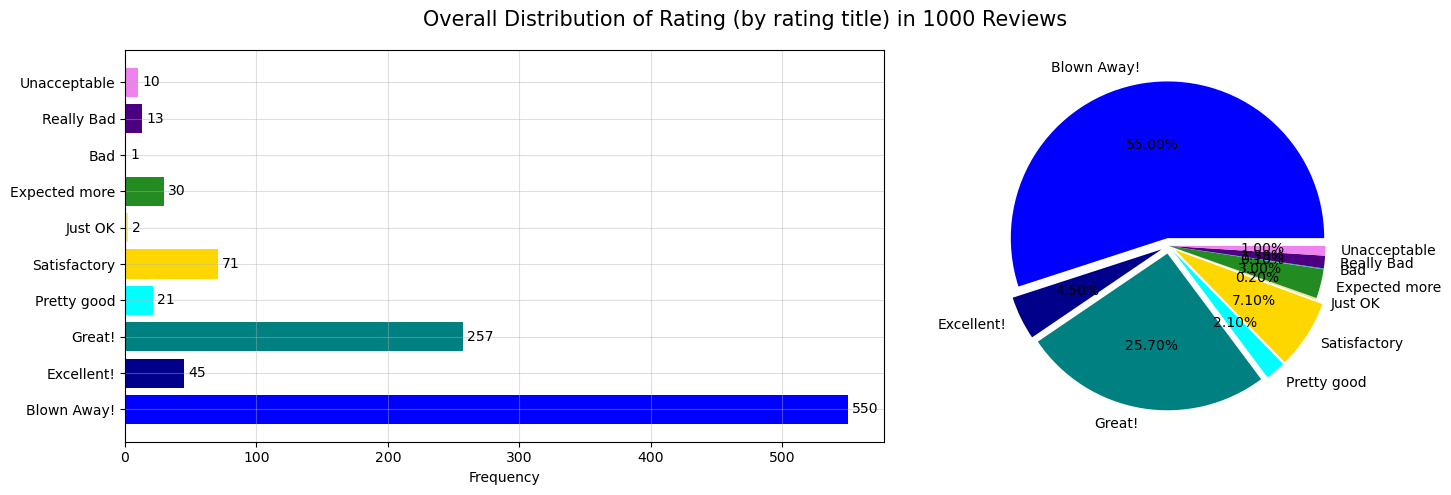

In [56]:
colors_2 = ['blue', 'darkblue', 'teal', 'cyan', 'gold', 'khaki', 'forestgreen', 'lightseagreen', 'indigo', 'violet']

# distribution of rating (by rating title)
rating_order = ['Unacceptable','Really Bad','Bad','Expected more','Just OK','Satisfactory','Pretty good','Great!','Excellent!','Blown Away!']
rating_title = bank_df['rating_title_by_user'].value_counts(sort=False).reindex(rating_order)
reversed_rating_title = rating_title[::-1]

# visualization in bar chart and pie chart
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=reversed_rating_title.index, width=reversed_rating_title.values, color=colors_2)
axes[0].set_xlabel('Frequency')

for index, values in enumerate (reversed_rating_title):
    axes[0].text(values+3, index, str(values), va='center')

axes[0].grid(alpha=0.4)
axes[1].pie(reversed_rating_title.values, labels=reversed_rating_title.index, autopct='%.2f%%', explode=explodes, colors=colors_2)
figure.suptitle('Overall Distribution of Rating (by rating title) in 1000 Reviews', fontsize=15)
plt.tight_layout()
plt.show()

### User Review Title

Below is a word cloud displaying the common vocabulary used by the user in their review title. The more prominent words are "Good", Service, "Best", etc. 

Apart from "Good" and "Best", other words like "Excellent", "improve", "friendly", "reliable", "safe", and "happy" suggest a positive overall experience or desired aspects of the bank's services. 

While the overall sentiment seems positive, words like "decrease", "worst", and "unhappy" suggest that there might be areas where the bank could improve.

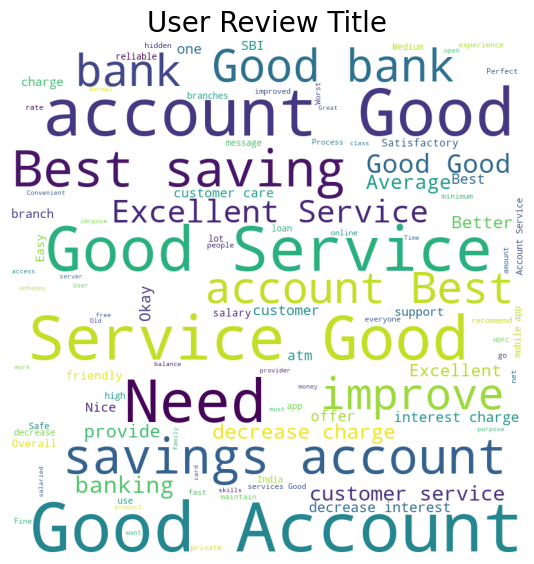

In [58]:
from wordcloud import WordCloud

combined_title = ' '.join(bank_df['review_title_by_user'])


# create a word cloud using the combined text
wordcloud_title = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10).generate(combined_title)

# plot the WordCloud image
plt.figure(figsize=(6,6))
plt.imshow(wordcloud_title)
plt.axis('off')
plt.title('User Review Title', fontsize=20)
plt.tight_layout(pad=2)
plt.show()

### User Review Title (with rating < 2.5)

Below is a word cloud displaying the common vocabulary used by the user in their review title with rating lower than 2.5. The more prominent negative terms are "improve", "service", "account" with words such as "pathetic", "average", "worst", "headache" which express strong negative emotions and experiences. 

"Customer" is quite prominent, and associated words like "respect", "support", "communication", and "respond" may suggest customer experience problems related to shortcomings in customer service and interactions. The issues appear to be centered around poor service quality, inadequate customer support, and potential problems with account management or specific banking practices.

The huge size of the word "Need" could suggest a fundamental gap between customer expectations and the bank's current offering hence understanding what specific needs are not being met is crucial for the bank.

Some actionable insights for IJJ: relook and prioritise on their service improvement and invest in customer service training to improve overall customer experience and satisfaction.

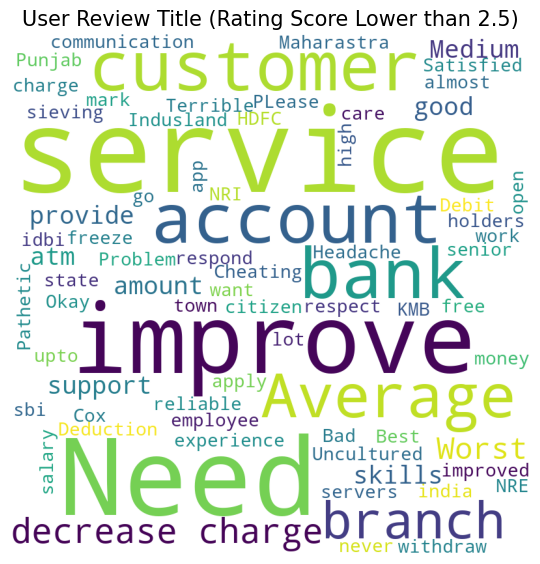

In [60]:
# Convert 'rating' to numeric, setting invalid parsing as NaN
bank_df['rating'] = pd.to_numeric(bank_df['rating'], errors='coerce')

# subset the data that rating score is 2.5 and lower
bank_df_copy = bank_df.copy()
bank_df_copy = bank_df[bank_df['rating']<=2.5]

combined_title_lowrate = ' '.join(bank_df_copy['review_title_by_user'])


# create a word cloud using the combined text
wordcloud_lowrate = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            min_font_size = 10).generate(combined_title_lowrate)

# plot the WordCloud image
plt.figure(figsize=(6,6))
plt.imshow(wordcloud_lowrate)
plt.axis('off')
plt.title('User Review Title (Rating Score Lower than 2.5)', fontsize=15)
plt.tight_layout(pad=2)
plt.show()

### User Review Title (with rating 4 and 5)

For user review title with rating of 4 and 5, below are some of the frequent words observed: 

- Positive Sentiment: "Good," "Excellent," "Best," "Nice," "Satisfactory"
- Banking Services: "Account," "Savings Account," "Service," "Bank," "Charge," "App"
- Customer Experience: "Friendly," "Easy Use," "Improve," "Trusted"

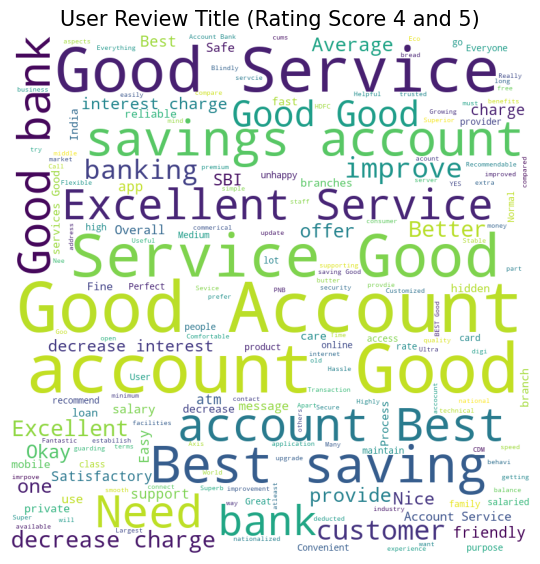

In [62]:
# Convert 'rating' to numeric, setting invalid parsing as NaN
bank_df['rating'] = pd.to_numeric(bank_df['rating'], errors='coerce')

# Subset the data that rating score is 4 or 5
bank_df_highrate = bank_df[(bank_df['rating'] >= 4) & (bank_df['rating'] <= 5)]

# Combine review titles into a single string
combined_title_highrate = ' '.join(bank_df_highrate['review_title_by_user'].astype(str)) #Added astype(str) to avoid possible errors

# Create a word cloud using the combined text
wordcloud_highrate = WordCloud(width=800, height=800,
                               background_color='white',
                               min_font_size=10).generate(combined_title_highrate)

# Plot the WordCloud image
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud_highrate)
plt.axis('off')
plt.title('User Review Title (Rating Score 4 and 5)', fontsize=15)
plt.tight_layout(pad=2)
plt.show()

<span style="color: blue; text-decoration: underline; font-size: 25px; font-weight: bold;">Feature Extraction</span>

#### Tokenization & Word Frequency/Occurences

- Perform text vectorization using **Word Frequency/Occurences method** by taking the review_modified and calculates the frequency of each word. There are 1,284 different words (vocabulary size) in the entire collection of review_modified. In terms of outcomes, there are total of 26,743 occurrences which is the total number of words across the reviews_modified column, counting repetitions.

In [64]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Ensure there are no NaN values in the text column
bank_df = bank_df.dropna(subset=['review_modified'])

# Tokenize and convert words to lowercase
all_words = [word.lower() for sent in bank_df['review_modified'] for word in word_tokenize(sent)]

# Compute word frequency
all_words_frequency = FreqDist(all_words)

# Print frequency distribution (total unique words and counts)
print("Total unique words:", len(all_words_frequency))
print("Word frequency distribution:", all_words_frequency)

# Print the 10 most common words
print("Top 10 words:", all_words_frequency.most_common(10))

Total unique words: 1284
Word frequency distribution: <FreqDist with 1284 samples and 27703 outcomes>
Top 10 words: [('account', 1908), ('use', 1110), ('year', 750), ('service', 743), ('good', 628), ('charge', 619), ('salary', 554), ('not', 530), ('maintain', 500), ('minimum', 484)]


#### Tokenization & Text Vectorization

- Perform text vectorization using the TF-IDF (Term Frequency-Inverse Document Frequency) method by taking the review_modified and converts them into numerical representation of TF-IDF matrix. There are 1,000 rows in the matrix and 1,277 unique words from the vocabulary refined in review_modified.

In [66]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the cleaned text to Bag of Words using TF-IDF Vectorizer
vectorizer = TfidfVectorizer()  # TF-IDF Vectorizer
X = vectorizer.fit_transform(bank_df['review_modified'])

# Check the result
print("Bag of Words shape:", X.shape)

Bag of Words shape: (1000, 1277)


In [67]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Transform the text data into a matrix of word counts
X = vectorizer.fit_transform(bank_df['review_modified'])

# Sum the word counts across all reviews
word_counts = np.asarray(X.sum(axis=0)).flatten()

# Get feature names (words)
words = vectorizer.get_feature_names_out()

# Combine words and their corresponding frequencies into a list of tuples
word_freq = list(zip(words, word_counts))

# Sort the list by frequency in descending order
sorted_word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Print top 10 most frequent words
print("Top 10 words by frequency:")
for word, freq in sorted_word_freq[:10]:
    print(f"{word}: {freq}")

# Print the shape of the resulting matrix
print("Bag of Words shape:", X.shape)

Top 10 words by frequency:
account: 1908
use: 1110
year: 750
service: 743
good: 628
charge: 619
salary: 554
not: 530
maintain: 500
minimum: 484
Bag of Words shape: (1000, 1277)


#### Using N-grams as features for sentiment analysis

- The model not only learns from individual words but also captures relationships between consecutive words, which improves sentiment classification.

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the n-gram range (e.g., unigram and bigram)
vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # (1, 2) means unigrams and bigrams

# Convert the cleaned text to Bag of Words using TF-IDF Vectorizer
X = vectorizer.fit_transform(bank_df['review_modified'])

# Check the result
print("Bag of Words shape:", X.shape)

# Optionally, you can also print the feature names (the n-grams) for better understanding
print("Feature names (n-grams):", vectorizer.get_feature_names_out())

Bag of Words shape: (1000, 9478)
Feature names (n-grams): ['aadhar' 'aadhar card' 'able' ... 'zero since' 'zomato' 'zomato swiggy']


<span style="color: blue; text-decoration: underline; font-size: 25px; font-weight: bold;">Model Training</span>

Rationale behind option of models: Logistics Regression and Naive Bayes models: Both are relatively computationally efficient and simple models, suitable for smaller datasets.

IJJ can consider training other models (such as Random Forest, SVM or deep learning models) when the bank reviews dataset becomes larger in future.
    
#### <u>Model 1.1</u>

&#8594; Model training for predicting sentiment using **multinomial logistic regression** based on current dataset (skewed data)

&#8594; **Metrics**: 
- Showing high accuracy of 0.873
- Class 2 - positive takes up majority of the class, dominating predictions (precision & recall close to 1.00).
- Classes 0 and 1 are ignored, as can be observed in 0% recall for Class 0 and Class 1.
- Macro Avg F1-score (unweighted mean) is low at 0.31, indicating poor performance on minority classes(0 and 1).

In [71]:
import pandas as pd
import joblib
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Mapping sentiment labels to numerical values
sentiment_mapping = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
bank_df['Sentiment'] = bank_df['Sentiment'].map(sentiment_mapping)

X = bank_df['review_modified']
y = bank_df['Sentiment']

# 1. Split dataset ONCE (Stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Vectorization (Apply the SAME transformation for both models & Apply n-grams transformation for both training and testing)
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))  # Unigrams and bigrams
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)  # Ensure test data is only transformed

# =============================
#  Model 1.1 Train on Imbalanced Data (Original)
# =============================
model_imbalanced = LogisticRegression(max_iter=1000)
model_imbalanced.fit(X_train_vectorized, y_train)

# Predict & Evaluate
y_pred_imbalanced = model_imbalanced.predict(X_test_vectorized)
print("Model 1.1 (Imbalanced Data - logistic_regression) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_imbalanced)}")
print(classification_report(y_test, y_pred_imbalanced))

Model 1.1 (Imbalanced Data - logistic_regression) Evaluation:
Accuracy: 0.8733333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        31
           2       0.87      1.00      0.93       262

    accuracy                           0.87       300
   macro avg       0.29      0.33      0.31       300
weighted avg       0.76      0.87      0.81       300



C:\Users\y\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\y\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\y\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### <u>Model 1.2</u>
#### Undersampling (RandomUnderSampler) & Oversampling (SMOTE) to handle imbalance dataset

&#8594; Training and evaluation of logistic regression model on resampled data using undersampling and SMOTE to handle class imbalance. The undersampled data (X_resampled, y_resampled) can then be used to train the machine learning model for sentiment analysis. The key improvement is addressing the class imbalance, which can significantly improve the performance of the model, where positive reviews constitues majority of the class.

&#8594; Now we have 17 reviews for each sentiment (Negative, Neutral, Positive).

&#8594; **Metrics**: 
- Accuracy is at 57% (dropped by 30.3% from 87.3% in the previous imbalanced model)
- Macro Avg F1-score at 0.40 (improved from 0.31)
- Better recall for minority classes (0 & 1) but at the cost of overall accuracy.

In [73]:
#  Model 1.2: Train on Resampled Data (UnderSampling + SMOTE)
# =============================
# Apply Undersampling
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_undersampled, y_train_undersampled = undersample.fit_resample(X_train_vectorized, y_train)

# Apply SMOTE on undersampled data
oversample = SMOTE(random_state=42)
X_train_over_undersampled, y_train_over_undersampled = oversample.fit_resample(X_train_undersampled, y_train_undersampled)

# Train model on resampled data
model_resampled = LogisticRegression(max_iter=1000)
model_resampled.fit(X_train_over_undersampled, y_train_over_undersampled)

# Predict & Evaluate
y_pred_resampled = model_resampled.predict(X_test_vectorized)
print("\nModel 1.2 (Resampled Data -logistic_regression) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_resampled)}")
print(classification_report(y_test, y_pred_resampled))

# =============================
# Save Models and Vectorizer
# =============================
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(model_imbalanced, 'logistic_regression_imbalanced.pkl')
joblib.dump(model_resampled, 'logistic_regression_resampled.pkl')


Model 1.2 (Resampled Data -logistic_regression) Evaluation:
Accuracy: 0.57
              precision    recall  f1-score   support

           0       0.24      0.57      0.33         7
           1       0.10      0.35      0.16        31
           2       0.89      0.60      0.71       262

    accuracy                           0.57       300
   macro avg       0.41      0.51      0.40       300
weighted avg       0.79      0.57      0.65       300



['logistic_regression_resampled.pkl']

In [74]:
# Assuming y_train_over_undersampled is your resampled sentiment labels
y_sampled = y_train_over_undersampled

# Count the number of reviews for each sentiment
sentiment_counts = y_sampled.value_counts()

print(f"Sentiment counts in resampled data:\n{sentiment_counts}")

Sentiment counts in resampled data:
Sentiment
0    17
1    17
2    17
Name: count, dtype: int64


In [75]:
print(bank_df['Sentiment'].value_counts())
print(y_train.value_counts())  # Check class distribution in training data
print(y_test.value_counts())   # Check class distribution in test data

Sentiment
2    873
1    103
0     24
Name: count, dtype: int64
Sentiment
2    611
1     72
0     17
Name: count, dtype: int64
Sentiment
2    262
1     31
0      7
Name: count, dtype: int64


#### <u>Model 2.1</u>
&#8594; Model training for predicting sentiment using **Naive Bayes** based on current dataset (skewed data)
 
&#8594; **Metrics**: 
- Overall Accuracy of 87.3%, quite close to the accuracy for multinomial regression model.
- Class 0: precision, recall and F1 score is low at 0, this is the same for Class 1.
- Model performs well on Class 2 with F1 score of 0.93.
- Model is highly biased towards Class 2 as can be observed from the metrics due to imbalanced data

In [77]:
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB  # Import Multinomial Naive Bayes
from sklearn.metrics import classification_report, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

X = bank_df['review_modified']
y = bank_df['Sentiment']

# 1. Split dataset ONCE (Stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Vectorization (Apply the SAME transformation for both models & Apply n-grams transformation for both training and testing)
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))  # Unigrams and bigrams
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# =============================
# Model 2.1: Train on Imbalanced Data (Original) - Naive Bayes
# =============================
model_imbalanced_nb = MultinomialNB()  # Use MultinomialNB
model_imbalanced_nb.fit(X_train_vectorized, y_train)

# Predict & Evaluate
y_pred_imbalanced_nb = model_imbalanced_nb.predict(X_test_vectorized)
print("Model 2.1 (Imbalanced Data - Naive Bayes) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_imbalanced_nb)}")
print(classification_report(y_test, y_pred_imbalanced_nb))

Model 2.1 (Imbalanced Data - Naive Bayes) Evaluation:
Accuracy: 0.8733333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        31
           2       0.87      1.00      0.93       262

    accuracy                           0.87       300
   macro avg       0.29      0.33      0.31       300
weighted avg       0.76      0.87      0.81       300



C:\Users\y\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\y\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\y\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### <u>Model 2.2</u>
#### Undersampling (RandomUnderSampler) & Oversampling (SMOTE) to handle imbalance dataset

&#8594; Training and evaluation of Naive Bayes model on resampled data using undersampling and SMOTE to handle class imbalance. The undersampled data (X_resampled, y_resampled) can then be used to train the machine learning model for sentiment analysis. The key improvement is addressing the class imbalance, which can significantly improve the performance of the model, where positive reviews constitues majority of the class

&#8594; Now we have 17 reviews for each sentiment (Negative, Neutral, Positive).

&#8594; **Metrics**: 
- Accuracy is at 57% (dropped by 30.3% from 87.3% in the previous imbalanced model, same as compared to Naive Bayes model (resampled version).This is expected as resampling forces the model to learn from all classes, reducing bias toward the majority class.
- Class 0 and 1 now have non-zero F1 scores, meaning the model is at least making some correct predictions for these classes.
- Recall improved for class 1 (0.35), meaning more instances of class 1 are now correctly classified.
- Macro Avg F1-score at 0.40 (improved from 0.31), meaning the model is now more balanced across all classes.

Hyperparameter tuning need to be applied to help improve the performnce of the imbalanced and resampled data. 

In [79]:
# Model 2.2: Train on Resampled Data (UnderSampling + SMOTE) - Naive Bayes
# =============================
# Apply Undersampling
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_undersampled, y_train_undersampled = undersample.fit_resample(X_train_vectorized, y_train)

# Apply SMOTE on undersampled data
oversample = SMOTE(random_state=42)
X_train_over_undersampled, y_train_over_undersampled = oversample.fit_resample(X_train_undersampled, y_train_undersampled)

# Train model on resampled data
model_resampled_nb = MultinomialNB()  # Use MultinomialNB
model_resampled_nb.fit(X_train_over_undersampled, y_train_over_undersampled)

# Predict & Evaluate
y_pred_resampled_nb = model_resampled_nb.predict(X_test_vectorized)
print("\nModel 2.2 (Resampled Data - Naive Bayes) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_resampled_nb)}")
print(classification_report(y_test, y_pred_resampled_nb))


# =============================
# Save Models and Vectorizer (Include the Naive Bayes models)
# =============================
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(model_imbalanced, 'logistic_regression_imbalanced.pkl')  # Keep Logistic Regression models too
joblib.dump(model_resampled, 'logistic_regression_resampled.pkl')
joblib.dump(model_imbalanced_nb, 'naive_bayes_imbalanced.pkl')  # Save Naive Bayes models
joblib.dump(model_resampled_nb, 'naive_bayes_resampled.pkl')


Model 2.2 (Resampled Data - Naive Bayes) Evaluation:
Accuracy: 0.5666666666666667
              precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.09      0.35      0.15        31
           2       0.89      0.60      0.72       262

    accuracy                           0.57       300
   macro avg       0.46      0.41      0.40       300
weighted avg       0.79      0.57      0.65       300



['naive_bayes_resampled.pkl']

<span style="color: blue; text-decoration: underline; font-size: 25px; font-weight: bold;">Model Scoring and Comparison</span>

&#8594; Both **Multinomial Logistics Regression - imbalance** and **Naive Bayes - imbalance** are the best-performing model among the 4 models below based on the **accuracy score of 0.873** but could be struggling with identifying minority classes (0 & 1). **Resampling helps to improve recall for minority** but it often comes at the cost of accuracy of the majority class. FI score may be a better measurement for this case as it balance out precision and recall (for imbalanced classes). 
Next, we apply hyperparameter tuning on the models to optimize model performance.

In [81]:
print("Model 1.1 (Imbalanced Data - logistic_regression) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_imbalanced)}")
print(classification_report(y_test, y_pred_imbalanced))

print("Model 1.2 (Resampled Data -logistic_regression) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_resampled)}")
print(classification_report(y_test, y_pred_resampled))

print("Model 2.1 (Imbalanced Data - Naive Bayes) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_imbalanced_nb)}")
print(classification_report(y_test, y_pred_imbalanced_nb))

print("\nModel 2.2 (Resampled Data - Naive Bayes) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_resampled_nb)}")
print(classification_report(y_test, y_pred_resampled_nb))

Model 1.1 (Imbalanced Data - logistic_regression) Evaluation:
Accuracy: 0.8733333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        31
           2       0.87      1.00      0.93       262

    accuracy                           0.87       300
   macro avg       0.29      0.33      0.31       300
weighted avg       0.76      0.87      0.81       300

Model 1.2 (Resampled Data -logistic_regression) Evaluation:
Accuracy: 0.57
              precision    recall  f1-score   support

           0       0.24      0.57      0.33         7
           1       0.10      0.35      0.16        31
           2       0.89      0.60      0.71       262

    accuracy                           0.57       300
   macro avg       0.41      0.51      0.40       300
weighted avg       0.79      0.57      0.65       300

Model 2.1 (Imbalanced Data - Naive Bayes) Evaluation:
Accuracy: 0.873333

C:\Users\y\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\y\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\y\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\y\anaconda3\Lib\site-packages\sklearn\metrics\_classificat

<span style="color: blue; text-decoration: underline; font-size: 25px; font-weight: bold;">Hyperparameter Tuning & Model Evaluation</span>

**Key Takeaways:**

✔ **Naive Bayes model (imbalance data - tuned)** has the highest accuracy (0.87) after hyperparameter tuning of the 4 models above, however, its macro avg F1 score (0.31) shows poor performance in class balance.

✔ Hyperparameter tuning helped Logistic Regression slightly with class balancing but did not significantly improve overall accuracy. No much change for Naive Bayes performance. Class imbalance is still an issue, especially for minority classes (0 and 1). Resampling helps with class balance but lowers overall accuracy.

✔ Best Model for Accuracy would be _**Naive Bayes (imbalance data -tuned)**_ while best model for detecting minority class would be _**Logistics Regression Model (resampled data -tuned)**_ with accuracy of 57% and better recall for minority class.

In [83]:
import pandas as pd
import joblib
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, make_scorer, f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

X = bank_df['review_modified']
y = bank_df['Sentiment']

# 1. Split dataset ONCE (Stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Vectorization (Apply the SAME transformation for both models)
# Apply n-grams (unigrams and bigrams)
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))  # Unigrams and bigrams
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Define a custom scorer (e.g., F1-score for imbalanced datasets)
f1_scorer = make_scorer(f1_score, average='weighted')  # 'weighted' handles class imbalance


# =============================
# Model 1.1: Logistic Regression - Hyperparameter Tuning
# =============================
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],            # Regularization type
    'solver': ['liblinear', 'saga']   # Algorithms to use (liblinear good for l1)
}

grid_search_lr_imbalanced = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring=f1_scorer, n_jobs=-1)  # Use cross-validation
grid_search_lr_imbalanced.fit(X_train_vectorized, y_train)

best_model_lr_imbalanced = grid_search_lr_imbalanced.best_estimator_
y_pred_lr_imbalanced = best_model_lr_imbalanced.predict(X_test_vectorized)
print("\nModel 1.1 (Imbalanced Data - Logistic Regression - Tuned) Evaluation:")
print(f"Best parameters: {grid_search_lr_imbalanced.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_imbalanced)}")
print(classification_report(y_test, y_pred_lr_imbalanced))


# =============================
# Model 1.2: Logistic Regression - Resampled Data - Hyperparameter Tuning
# =============================
# ... (Undersampling and SMOTE as before)

grid_search_lr_resampled = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring=f1_scorer, n_jobs=-1)
grid_search_lr_resampled.fit(X_train_over_undersampled, y_train_over_undersampled)

best_model_lr_resampled = grid_search_lr_resampled.best_estimator_
y_pred_lr_resampled = best_model_lr_resampled.predict(X_test_vectorized)
print("\nModel 1.2 (Resampled Data - Logistic Regression - Tuned) Evaluation:")
print(f"Best parameters: {grid_search_lr_resampled.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_resampled)}")
print(classification_report(y_test, y_pred_lr_resampled))


# =============================
# Model 2.1: Naive Bayes - Hyperparameter Tuning (Smoothing)
# =============================
param_grid_nb = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]  # Smoothing parameter (Laplace smoothing)
}

grid_search_nb_imbalanced = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring=f1_scorer, n_jobs=-1)
grid_search_nb_imbalanced.fit(X_train_vectorized, y_train)

best_model_nb_imbalanced = grid_search_nb_imbalanced.best_estimator_
y_pred_nb_imbalanced = best_model_nb_imbalanced.predict(X_test_vectorized)
print("\nModel 2.1 (Imbalanced Data - Naive Bayes - Tuned) Evaluation:")
print(f"Best parameters: {grid_search_nb_imbalanced.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb_imbalanced)}")
print(classification_report(y_test, y_pred_nb_imbalanced))


# =============================
# Model 2.2: Naive Bayes - Resampled Data - Hyperparameter Tuning
# =============================
grid_search_nb_resampled = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring=f1_scorer, n_jobs=-1)
grid_search_nb_resampled.fit(X_train_over_undersampled, y_train_over_undersampled)

best_model_nb_resampled = grid_search_nb_resampled.best_estimator_
y_pred_nb_resampled = best_model_nb_resampled.predict(X_test_vectorized)
print("\nModel 2.2 (Resampled Data - Naive Bayes - Tuned) Evaluation:")
print(f"Best parameters: {grid_search_nb_resampled.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb_resampled)}")
print(classification_report(y_test, y_pred_nb_resampled))


# ... (Save the best models and vectorizer)
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(best_model_lr_imbalanced, 'logistic_regression_imbalanced_tuned.pkl')
joblib.dump(best_model_lr_resampled, 'logistic_regression_resampled_tuned.pkl')
joblib.dump(best_model_nb_imbalanced, 'naive_bayes_imbalanced_tuned.pkl')
joblib.dump(best_model_nb_resampled, 'naive_bayes_resampled_tuned.pkl')

C:\Users\y\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Model 1.1 (Imbalanced Data - Logistic Regression - Tuned) Evaluation:
Best parameters: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.8466666666666667
              precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       0.22      0.13      0.16        31
           2       0.89      0.95      0.92       262

    accuracy                           0.85       300
   macro avg       0.54      0.41      0.43       300
weighted avg       0.81      0.85      0.82       300


Model 1.2 (Resampled Data - Logistic Regression - Tuned) Evaluation:
Best parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.5733333333333334
              precision    recall  f1-score   support

           0       0.21      0.57      0.31         7
           1       0.11      0.39      0.17        31
           2       0.90      0.60      0.72       262

    accuracy                           0.57       300
   macro avg     

C:\Users\y\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\y\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\y\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['naive_bayes_resampled_tuned.pkl']

<span style="color: blue; text-decoration: underline; font-size: 25px; font-weight: bold;">New Prediction</span>

&#8594; **Predicting new reviews** (based on positive, neutral and negative sentiment) to test the four models. **Applied the same preprocessing steps** per training model.

&#8594; Apart from relooking and **prioritising on their service improvement** and **invest in customer service training** based on above analysis, IJJ bank can also **leverage on the model to predict sentiments and track customer satisfaction** over time. It also helps identify pain points where the bank can relate and enable a more proactive outreach to address the issue. The bank reviews can also be used to **discover trends and emerging customer needs** that can help to guide the **development of new products/features** that align with customer preferences and pain points.

&#8594; Based on below predictions across all 4 models, <u>Naive Bayes (Resampled data)-Tuned</u> model has the highest number of correct predictions among the 4 models. 

- Logistics Regression (Imbalance data)-Tuned: 33.3% (3 correct out of 9 predictions)
- Logistics Regression (Resampled data) -Tuned 55.5% (5 correct out of 9 predictions)
- Naive Bayes (Imbalanced data)-Tune: 33.3% (3 correct out of 9 predictions)
- <span style="color: green; font-weight: bold;">Naive Bayes (Resampled data)-Tuned: 67% (6 correct out of 9 predictions)  </span>  -> _**Best model among all, slightly better vs LR resampled model**_

In [85]:
import pandas as pd
import joblib
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# Download NLTK resources (if not already downloaded)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

# Define negation words to retain
negation_words = {"not", "no", "never", "none", "nothing", "nowhere", "neither", "nobody", "isn't", "aren't", "wasn't", "weren't", 
                  "doesn't", "don't", "didn't", "hasn't", "haven't", "hadn't", "won't", "wouldn't", "shan't", "shouldn't", "can't", "cannot", "couldn't", "mustn't"}

# Load the vectorizer and models
vectorizer = joblib.load('tfidf_vectorizer.pkl')
model_lr_imbalanced = joblib.load('logistic_regression_imbalanced_tuned.pkl')
model_lr_resampled = joblib.load('logistic_regression_resampled_tuned.pkl')
model_nb_imbalanced = joblib.load('naive_bayes_imbalanced_tuned.pkl')
model_nb_resampled = joblib.load('naive_bayes_resampled_tuned.pkl')

def preprocess_text(text):
    text = text.lower()
    words = word_tokenize(text)

    # Get the list of NLTK stopwords and define custom stopwords
    stop_words = set(stopwords.words('english'))
    custom_stop_words = {"bank", "banking", "balance", "money", "transaction"}  # Add your custom stop words

    # Combine stopwords and custom stopwords, but exclude negation words from being removed
    all_stop_words = stop_words.union(custom_stop_words) - negation_words  # Remove negation words from stopwords

    # Filter the words, keeping the negation words
    filtered_words = [w for w in words if w not in all_stop_words and w not in string.punctuation and not w.isdigit()]

    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []
    pos_tags_words = pos_tag(filtered_words) #POS tag before lemmatization
    for word, tag in pos_tags_words:
        pos = 'n'
        if tag.startswith('J'):
            pos = 'a'
        elif tag.startswith('V'):
            pos = 'v'
        elif tag.startswith('R'):
            pos = 'r'
        lemmatized_word = lemmatizer.lemmatize(word, pos=pos)
        lemmatized_words.append(lemmatized_word)

    return " ".join(lemmatized_words)  # Join back into a string


def predict_sentiment(review):
    processed_review = preprocess_text(review)
    review_vectorized = vectorizer.transform([processed_review])

    # Make predictions with all models
    prediction_lr_imbalanced = model_lr_imbalanced.predict(review_vectorized)[0]
    prediction_lr_resampled = model_lr_resampled.predict(review_vectorized)[0]
    prediction_nb_imbalanced = model_nb_imbalanced.predict(review_vectorized)[0]
    prediction_nb_resampled = model_nb_resampled.predict(review_vectorized)[0]

    sentiment_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}

    return {
        "Logistic Regression (Imbalanced)": sentiment_mapping[prediction_lr_imbalanced],
        "Logistic Regression (Resampled)": sentiment_mapping[prediction_lr_resampled],
        "Naive Bayes (Imbalanced)": sentiment_mapping[prediction_nb_imbalanced],
        "Naive Bayes (Resampled)": sentiment_mapping[prediction_nb_resampled],
    }

# Bank reviews for prediction
reviews_to_predict = [
    "I had the worst experience with XYZ Bank. I opened an account because of their low fees, but now they’re charging hidden fees for things I wasn’t even aware of. I’ve spent hours on the phone with customer service, but they can’t seem to fix the issue. On top of that, the ATM system is terrible—half the time I try to withdraw money, it doesn't work. I’m closing my account.",
    "XYZ Bank is just okay. I use them for my day-to-day banking, and I haven’t had any serious problems. Their app works fine, and I get access to my money when I need it. That said, I don’t feel like they go above and beyond to make me feel like a valued customer. They offer standard services but haven’t wowed me in any way.",
    "I’ve been with XYZ Bank for years, and they never disappoint! Their credit card rewards program is fantastic, and I always get points for every purchase. The online banking features are very user-friendly, and I love the new budgeting tools they've recently added to the app. Plus, their customer service is always quick to resolve any issues. Highly recommended!",
    "Fantastic bank! I switched to XYZ Bank last year, and I’ve been thoroughly impressed with their services. The sign-up process was super easy, and I love how user-friendly the mobile app is. I recently applied for a personal loan with them, and it was such a smooth experience. The rates are great, and I got approved quickly.",
    "Bank did not disappoint me, they are very experience and friendly",
    "Poor service at XYZ Bank. I faced multiple issues with my account, and it took forever to resolve them. Hidden charges and high fees made it even worse. Not recommended",
    "Banking with DEF Bank has been fine. The services are okay, but nothing exceptional. They offer competitive interest rates, but I haven't experienced any standout features or customer service.",
    "I am extremely disappointed with XYZ Bank. The customer support was unhelpful, and it took forever for them to process my loan application. I had to call multiple times and still received no clear answers. I would not recommend this bank to anyone.",
    "This bank is fine for everyday use, but I haven’t found it to be much different from other options. The fees are manageable, and the customer service is generally helpful. The mobile app works as expected, but it could use some improvements."
]

# Iterate over each review and make predictions
for review in reviews_to_predict:
    predictions = predict_sentiment(review)
    print(f"\nReview: {review}")
    print("\nPredictions:")
    for model_name, prediction in predictions.items():
        print(f"{model_name}: {prediction}")
    print("-" * 30)


Review: I had the worst experience with XYZ Bank. I opened an account because of their low fees, but now they’re charging hidden fees for things I wasn’t even aware of. I’ve spent hours on the phone with customer service, but they can’t seem to fix the issue. On top of that, the ATM system is terrible—half the time I try to withdraw money, it doesn't work. I’m closing my account.

Predictions:
Logistic Regression (Imbalanced): Neutral
Logistic Regression (Resampled): Negative
Naive Bayes (Imbalanced): Positive
Naive Bayes (Resampled): Negative
------------------------------

Review: XYZ Bank is just okay. I use them for my day-to-day banking, and I haven’t had any serious problems. Their app works fine, and I get access to my money when I need it. That said, I don’t feel like they go above and beyond to make me feel like a valued customer. They offer standard services but haven’t wowed me in any way.

Predictions:
Logistic Regression (Imbalanced): Positive
Logistic Regression (Resampl

### Models with Resampled data (Logistics Regression and Naive Bayes)

Generally, the models with resampled data are better at capturing neutral/negative reviews (miniority class) as compared to the models trained with imbalanced data.

Let's compare both resampled models (no major difference in their performance metrics) on <span style="color:blue;">**more neutral and negative reviews**.</span>  _(10 neutral and 10 negative reviews)._

- <span style="color: green; font-weight: bold;">Logistics Regression (Resampled data) -Tuned: 50% (10 correct out of 20 predictions) </span>  -> _**Performed slightly better as compared with NB resampled model**_
- Naive Bayes (Resampled data)-Tuned: 35% (7 correct out of 20 predictions)

We also looked at how these "resampled data" models are predicting on <span style="color:blue;">**positive bank reviews**.</span> as their accuracy on positive reviews could be compromised during the resampling phase. Based on 8 positive reviews: 

- <span style="color: green; font-weight: bold;">Logistics Regression (Resampled data) -Tuned: 50% (4 correct out of 8 predictions) </span>  -> _**Performed slightly better as compared with NB resampled model**_
- Naive Bayes (Resampled data)-Tuned: 37.5% (3 correct out of 8 predictions)

In [156]:
# Download NLTK resources (if not already downloaded)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

# Define negation words to retain
negation_words = {"not", "no", "never", "none", "nothing", "nowhere", "neither", "nobody", "isn't", "aren't", "wasn't", "weren't", 
                  "doesn't", "don't", "didn't", "hasn't", "haven't", "hadn't", "won't", "wouldn't", "shan't", "shouldn't", "can't", "cannot", "couldn't", "mustn't"}

# Load the vectorizer and models
vectorizer = joblib.load('tfidf_vectorizer.pkl')
model_lr_resampled = joblib.load('logistic_regression_resampled_tuned.pkl')
model_nb_resampled = joblib.load('naive_bayes_resampled_tuned.pkl')

def preprocess_text(text):
    text = text.lower()
    words = word_tokenize(text)

    # Get the list of NLTK stopwords and define custom stopwords
    stop_words = set(stopwords.words('english'))
    custom_stop_words = {"bank", "banking", "balance", "money", "transaction"}  # Add your custom stop words

    # Combine stopwords and custom stopwords, but exclude negation words from being removed
    all_stop_words = stop_words.union(custom_stop_words) - negation_words  # Remove negation words from stopwords

    # Filter the words, keeping the negation words
    filtered_words = [w for w in words if w not in all_stop_words and w not in string.punctuation and not w.isdigit()]

    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []
    pos_tags_words = pos_tag(filtered_words) #POS tag before lemmatization
    for word, tag in pos_tags_words:
        pos = 'n'
        if tag.startswith('J'):
            pos = 'a'
        elif tag.startswith('V'):
            pos = 'v'
        elif tag.startswith('R'):
            pos = 'r'
        lemmatized_word = lemmatizer.lemmatize(word, pos=pos)
        lemmatized_words.append(lemmatized_word)

    return " ".join(lemmatized_words)  # Join back into a string


def predict_sentiment(review):
    processed_review = preprocess_text(review)
    review_vectorized = vectorizer.transform([processed_review])

    # Make predictions with all models
    prediction_lr_resampled = model_lr_resampled.predict(review_vectorized)[0]
    prediction_nb_resampled = model_nb_resampled.predict(review_vectorized)[0]

    sentiment_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}

    return {
        "Logistic Regression (Resampled)": sentiment_mapping[prediction_lr_resampled],
        "Naive Bayes (Resampled)": sentiment_mapping[prediction_nb_resampled],
    }

# Bank reviews for prediction
reviews_to_predict = [
    "The bank offers decent services, but there is room for improvement. The staff is generally helpful, but sometimes the wait times are long. Overall, my experience has been fine, but I think there are other banks that offer similar services with more convenience.",
    "I had the worst experience with this bank. The customer service was terrible, and my account was charged fees that I was never informed about. When I called to resolve the issue, no one was helpful, and I felt completely ignored. I'm switching to another bank as soon as possible.",
    "The bank is alright.",
    "The staff at my local branch are consistently rude and unprofessional.",
    "The bank does what it's supposed to. Nothing special, but no major issues.",
    "The mobile app is buggy and unreliable.",
    "It's a bank. I've had no particularly good or bad experiences.",
    "Transactions take an excessively long time to process.",
    "Security is a concern. I've had issues with unauthorized access to my account.",
    "The fees are standard. Nothing unexpected.",
    "I had a fraudulent charge on my debit card, and the bank was very slow to respond and help me resolve the issue.",
    "I called customer service, and they answered my question. The wait time was average.",
    "They hit me with hidden fees. I was charged for services I didn't authorize.",
    "They offer basic checking and savings accounts.",
    "The staff is unhelpful. They don't seem to know how to resolve problems.",
    "The branch is open during standard hours. It's convenient enough.",
    "The loan process was a nightmare. There were constant delays and miscommunications.",
    "I didn't have any problems, but I also didn't have any memorable positive interactions.",
    "They promised to follow up with me, but they never did.",
    "Mobile banking is a nightmare. Transactions take forever to process, and the app logs me out randomly.",
    "Fantastic and good service! highly recommend",
    "I'm very happy with my banking experience. I would highly recommend this bank to anyone.",
    "I appreciate the financial advice that the bank provides. They've helped me make smart decisions about my money.",
    "Online banking is very secure and user-friendly. I appreciate the convenience of being able to manage my accounts from anywhere.",
    "This bank is amazing, they have helped me through some tough financial times.",
    "The mobile app is fantastic! It's easy to use, and I can do everything from checking my balance to depositing checks from my phone.",
    "I had a problem with a fraudulent charge on my account, and the bank's fraud department handled it quickly and efficiently. I was impressed with their professionalism and responsiveness.",
    "I really appreciate the banks online security features. I feel very safe when conducting my banking online."

]

# Iterate over each review and make predictions
for review in reviews_to_predict:
    predictions = predict_sentiment(review)
    print(f"\nReview: {review}")
    print("\nPredictions:")
    for model_name, prediction in predictions.items():
        print(f"{model_name}: {prediction}")
    print("-" * 30)


Review: The bank offers decent services, but there is room for improvement. The staff is generally helpful, but sometimes the wait times are long. Overall, my experience has been fine, but I think there are other banks that offer similar services with more convenience.

Predictions:
Logistic Regression (Resampled): Negative
Naive Bayes (Resampled): Positive
------------------------------

Review: I had the worst experience with this bank. The customer service was terrible, and my account was charged fees that I was never informed about. When I called to resolve the issue, no one was helpful, and I felt completely ignored. I'm switching to another bank as soon as possible.

Predictions:
Logistic Regression (Resampled): Negative
Naive Bayes (Resampled): Negative
------------------------------

Review: The bank is alright.

Predictions:
Logistic Regression (Resampled): Negative
Naive Bayes (Resampled): Negative
------------------------------

Review: The staff at my local branch are cons

<span style="color: blue; text-decoration: underline; font-size: 25px; font-weight: bold;">Final Conclusion & Recommendation</span>

While it is important to predict positive reviews, the identification of neutral and negative reviews are equally or more crucial. 
In banking, overlooking negative or neutral feedback can have serious consequences (reputational damage, regulatory issues, customer churn). We need to **understand customer real feedback and thoughts**, to have better overall view of customer sentiment which in the long run build more trust. **Identifying negative and neutral feedback is essential for improving customer satisfaction and addressing underlying issues.**

In conclusion, <span style="color:darkorange;">**"Logistics Regression (Resampled data) -Tuned" model**</span> is generally the better option for analyzing bank reviews. It provides a <span style="color:darkorange;">**more balanced approach**</span> that prioritizes accuracy and risk mitigation _as compared with the other models_.

Another alternative would be to <span style="color:brown;">**use both models**</span> - model with resample data can be used for <span style="color:brown;">**internal purpose, risk management and customer/service recovery**</span> and model with imbalance data that are good at predicting positive reviews, for <span style="color:brown;">**marketing purpose**.</span>

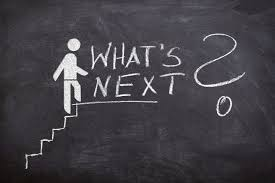

The next step for IJJ would be to deploy the model for business use. 
1. Deploy model for batch processing or real-time. IJJ can run sentiment analysis on periodic basis on large volume of customer feedback.
2. From there, identify and categorize the negative sentiments into different groupings to **identify critical areas for improvement** - **customer services, product issues, new products, loan issues etc**. Mitigation/recommendation can be made on policy based on customer complaints. **Training of employees** based on interactions and feedback rated negatively by customers. **Tracking of sentiment trends over time** should be implemented to measure service improvement (leverage of visualization tool such as Power BI or Tableau). This will then help with driving customer experience and build trust, in **reducing the likelihood of customer leaving for competitors** (customer feel heard and will more likely to remain loyal).


3. For the positive reviews, it can be used for _marketing/brand building_ and _strengthen customer relationships._
   
   - **Marketing/brand building**: IJJ can consider featuring customer testimonials and feedback on bank's website/social media to boost branding and reputation. Identify what customer love in general use these insights to craft marketing messages for marketing campaigns, promote the service/products that frequently mentioned in the positive reviews.
   
   - **Strengthen customer relationship**: Sentiment anallysis can also be used to pinpoint services, staffor features that customer appreciate the most. IJJ can replicate them as best practices by training employess based on highly rated customer interactions and consider inviting happy/satisfied customers to exclusive events to build long-term relationships thus encouraging repeated business. From the positive feedback, IJJ can also identify features that customer love and expand them/innovate new products.
  
By leveraging insights on customer sentiments, IJJ bank can **enhance their marketing strategies**, increase **customer retention** and **stengthen customer relationship**, ultimately **driving business growth.**

This is _not a one-time exercise_, the commitment to improvement is crucial for IJJ in fostering better customer satisfaction, which is **essential for customer retention**. IJJ also needs to continuously collect customer feedback for more insights and better train the models _(and have more balanced dataset)_ for prediction. 
Simple cycle-loop that IJJ needs to adopt: 
- Customers provide feedback
- IJJ analyzes the feedback
- IJJ takes action to improve
- IJJ measures the impact of those actions
- The cycle repeats

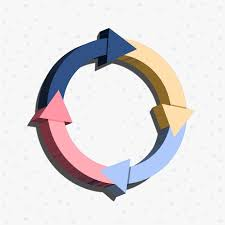